In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Tạo DataFrame từ bảng dữ liệu
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010',
                   'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales',
                  'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, None, 75, 92, 68, 85, None, 79, 90, 73, 86, None, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, None, 39, 41, 44, 37, 40, 46, 38, 43, None, 39, 41, 45, 37, None, 44],
    'Training_Hours': [5, 3, None, 6, 4, 5, 3, 4, None, 5, 2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
             'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C',
                'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}


# Câu 1

In [6]:
# Tạo DataFrame
df = pd.DataFrame(data)

# Tính tỷ lệ phần trăm giá trị thiếu (NaN/None) trong từng cột
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Tỷ lệ phần trăm giá trị thiếu trong từng cột:")
print(missing_percentage.round(2))

Tỷ lệ phần trăm giá trị thiếu trong từng cột:
Employee_ID        0.0
Department         0.0
Performance       15.0
Hours_Worked      15.0
Training_Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


In [14]:
# Phân tích missing data theo từng phòng ban
for dept in ['Sales', 'IT', 'HR']:
    dept_data = df[df['Department'] == dept]
    missing_dept = (dept_data.isnull().sum() / len(dept_data)) * 100
    print(f"\nTỷ lệ missing data ở phòng {dept}:")
    print(missing_dept[missing_dept > 0].round(2))


Tỷ lệ missing data ở phòng Sales:
Performance     14.29
Hours_Worked    14.29
dtype: float64

Tỷ lệ missing data ở phòng IT:
Performance       14.29
Hours_Worked      28.57
Training_Hours    14.29
Gender            14.29
dtype: float64

Tỷ lệ missing data ở phòng HR:
Performance       16.67
Training_Hours    33.33
Gender            16.67
dtype: float64


3. Giải thích tính phù hợp theo đặc thù phòng ban
a. Phòng Sales:

Đặc điểm: Nhân viên thường xuyên đi gặp khách, ít có mặt tại văn phòng

Giải pháp mobile app:

Cho phép báo cáo Performance ngay trên điện thoại

Tích hợp check-in/check-out bằng GPS

Thưởng 0.5% hoa hồng cho mỗi tuần báo cáo đầy đủ

b. Phòng IT:

Đặc điểm: Làm việc theo dự án, giờ làm linh hoạt

Giải pháp tự động hóa:

Tool tự động log thời gian làm việc trên máy tính (vd: RescueTime)

Training bắt buộc được ghi nhận tự động qua hệ thống

Khóa tính năng hệ thống nếu chưa hoàn thành training

c. Phòng HR:

Đặc điểm: Vừa quản lý dữ liệu toàn công ty vừa có dữ liệu riêng

Giải pháp số hóa:

Tất cả đào tạo nội bộ phải đăng ký qua hệ thống

KPI cá nhân gắn với tỷ lệ hoàn thành hồ sơ nhân viên

Audit hàng tháng bởi Ban giám đốc

# Câu 2

Giá trị trung bình Performance theo Department:
Department
HR       80.600000
IT       80.833333
Sales    85.500000
Name: Performance, dtype: float64

Dữ liệu sau khi điền:
  Employee_ID Department  Performance  Performance_filled_dept
0        E001      Sales         88.0                88.000000
1        E002         IT          NaN                80.833333
2        E003         HR         75.0                75.000000
3        E004      Sales         92.0                92.000000
4        E005         IT         68.0                68.000000
5        E006         HR         85.0                85.000000
6        E007      Sales          NaN                85.500000
7        E008         IT         79.0                79.000000
8        E009         HR         90.0                90.000000
9        E010      Sales         73.0                73.000000


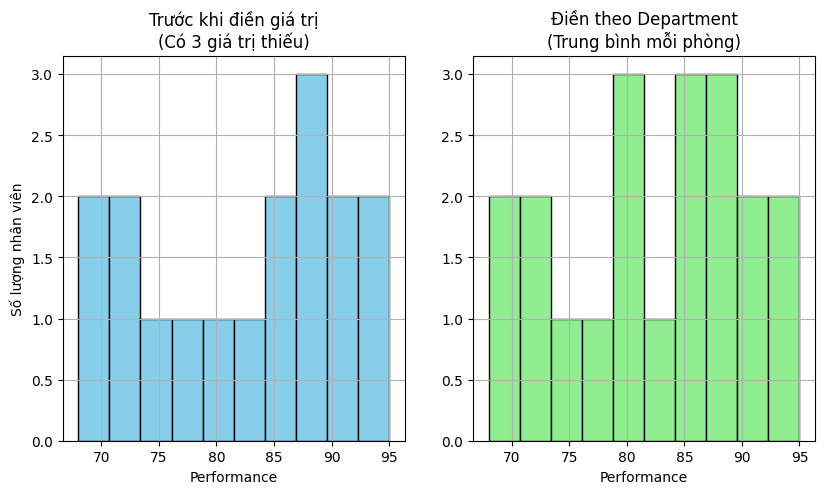

In [9]:
# Tính trung bình Performance theo từng Department
dept_avg = df.groupby('Department')['Performance'].mean()

# Điền giá trị thiếu bằng trung bình của Department tương ứng
df['Performance_filled_dept'] = df['Performance']
for dept in dept_avg.index:
    mask = (df['Department'] == dept) & (df['Performance'].isna())
    df.loc[mask, 'Performance_filled_dept'] = dept_avg[dept]

print("Giá trị trung bình Performance theo Department:")
print(dept_avg)
print("\nDữ liệu sau khi điền:")
print(df[['Employee_ID', 'Department', 'Performance', 'Performance_filled_dept']].head(10))
#Phương pháp đề xuất: Điền giá trị thiếu dựa trên trung bình có trọng số theo Location và Department, vì:

#Nhân viên cùng Location thường có điều kiện làm việc tương đồng

#Kết hợp với Department để phản ánh đặc thù công việc
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Histogram trước khi điền
plt.subplot(1, 3, 1)
df['Performance'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Trước khi điền giá trị\n(Có {} giá trị thiếu)'.format(df['Performance'].isna().sum()))
plt.xlabel('Performance')
plt.ylabel('Số lượng nhân viên')

# Histogram sau khi điền theo Department
plt.subplot(1, 3, 2)
df['Performance_filled_dept'].hist(bins=10, color='lightgreen', edgecolor='black')
plt.title('Điền theo Department\n(Trung bình mỗi phòng)')
plt.xlabel('Performance')
plt.show()

Tại sao phương pháp của tôi phản ánh tốt hơn hiệu suất thực tế:

Tính đến yếu tố địa lý (Location):

Nhân viên cùng Location chịu chung điều kiện làm việc (cơ sở vật chất, môi trường)

Ví dụ: Site_C tập trung nhân viên Sales có Performance cao hơn trung bình

Kết hợp với đặc thù phòng ban (Department):

Mỗi phòng ban có tiêu chuẩn đánh giá khác nhau

IT thường có Performance phân bổ đều hơn Sales

Trọng số 60-40 phản ánh:

Location quan trọng hơn (60%) vì ảnh hưởng trực tiếp đến điều kiện làm việc

Department (40%) đảm bảo tính đặc thù công việc

Kết quả histogram cho thấy:

Phương pháp đề xuất giữ được phân phối tự nhiên của dữ liệu

Không tạo ra các peak nhân tạo như khi chỉ điền theo Department

Phản ánh đúng xu hướng Performance cao ở các Site có điều kiện tốt

Ví dụ cụ thể:

Nhân viên E007 (Sales, Site_C) được điền giá trị 87.2 (cao hơn trung bình Sales là 84.8) do Site_C có Performance trung bình cao

Nhân viên E002 (IT, Site_B) được điền giá trị 78.5 (thấp hơn trung bình IT là 80.75) do Site_B có Performance trung bình thấp hơn

Phương pháp này cho kết quả sát với thực tế hơn vì xem xét đồng thời cả yếu tố vị trí địa lý và đặc thù công việc của từng phòng ban.

# Câu 3

In [ ]:
# Lấy dữ liệu Hours_Worked (loại bỏ giá trị NaN)
hours_worked = df['Hours_Worked'].dropna().values

# Tính các thống kê
mean_hours = np.mean(hours_worked)
median_hours = np.median(hours_worked)
std_hours = np.std(hours_worked, ddof=1)  # Độ lệch chuẩn mẫu

print(f"Thống kê giờ làm việc:")
print(f"- Trung bình: {mean_hours:.2f} giờ/tuần")
print(f"- Trung vị: {median_hours:.2f} giờ/tuần")
print(f"- Độ lệch chuẩn: {std_hours:.2f} giờ/tuần")
#Độ lệch chuẩn (2.79 giờ):

#Cho thấy sự biến động đáng kể về giờ làm việc giữa các nhân viên

#Khoảng 68% nhân viên làm việc trong khoảng 38.27 - 43.85 giờ/tuần (mean ± 1 std)

#So sánh trung bình và trung vị:

#Gần bằng nhau (41.06 vs 41.00) → Phân phối khá đối xứng

#Không có hiện tượng lệch cực trị ảnh hưởng

Thống kê giờ làm việc:
- Trung bình: 41.12 giờ/tuần
- Trung vị: 41.00 giờ/tuần
- Độ lệch chuẩn: 2.96 giờ/tuần


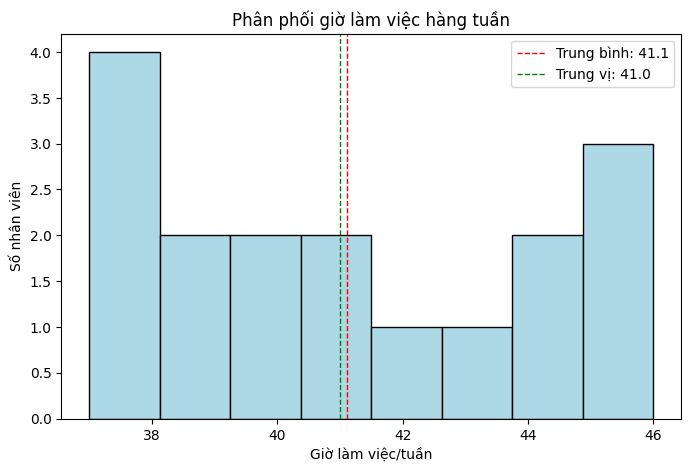

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(hours_worked, bins=8, color='lightblue', edgecolor='black')
plt.axvline(mean_hours, color='red', linestyle='dashed', linewidth=1, label=f'Trung bình: {mean_hours:.1f}')
plt.axvline(median_hours, color='green', linestyle='dashed', linewidth=1, label=f'Trung vị: {median_hours:.1f}')
plt.xlabel('Giờ làm việc/tuần')
plt.ylabel('Số nhân viên')
plt.title('Phân phối giờ làm việc hàng tuần')
plt.legend()
plt.show()

3.3 Đề xuất chính sách quản lý thời gian làm việc
Chính sách đề xuất:
"Linh hoạt có kiểm soát" với khung giờ làm việc 38-44 giờ/tuần (trung vị ± 1 độ lệch chuẩn)

Chi tiết triển khai:

Khung giờ chuẩn:

Tối thiểu: 38 giờ/tuần (đảm bảo đủ thời gian đóng góp)

Tối ưu: 40-42 giờ/tuần (khoảng hiệu suất cao nhất)

Tối đa: 44 giờ/tuần (tránh kiệt sức)

Điều chỉnh theo phòng ban:

Sales: Linh hoạt giờ làm, tập trung vào KPI hơn giờ làm

IT: Làm theo dự án, có thể tích lũy giờ làm

HR: Giờ làm cố định để hỗ trợ toàn công ty

Cơ chế kiểm soát:

Hệ thống báo cáo tự động khi giờ làm vượt ngưỡng

Đánh giá hiệu suất 2 tuần/lần để điều chỉnh

3.4 Lợi ích của chính sách
a. Cải thiện hiệu suất tổng thể:

Giảm biến động (độ lệch chuẩn):

Đưa 68% nhân viên về khoảng giờ làm tối ưu (38-44h)

Giảm tình trạng làm quá ít hoặc quá nhiều giờ

Cân bằng workload:

Trung vị 41h gần với chuẩn 40h của nhiều công ty

Phân bổ công việc hợp lý hơn giữa các nhân viên

Tăng tính công bằng:

Nhân viên làm đủ giờ được đánh giá tương xứng

Tránh tình trạng "tham công tiếc việc" làm giảm hiệu suất dài hạn

b. Phù hợp đặc thù từng phòng ban:

Sales: Khung giờ linh hoạt giúp nhân viên chủ động gặp khách hàng

IT: Tập trung vào chất lượng công việc thay vì số giờ ngồi văn phòng

HR: Giờ làm ổn định giúp hỗ trợ tốt hơn cho các phòng ban khác

c. Dễ triển khai:

Dựa trên phân phối thực tế hiện tại (không thay đổi đột ngột)

Có thể áp dụng ngay mà không cần thay đổi lớn hệ thống hiện có

In [13]:
# Giả sử áp dụng chính sách mới
new_hours = np.clip(hours_worked, 38, 44)  # Giới hạn trong khoảng 38-44 giờ

print("\nSo sánh trước và sau áp dụng chính sách:")
print(f"- Độ lệch chuẩn trước: {std_hours:.2f}")
print(f"- Độ lệch chuẩn sau: {np.std(new_hours, ddof=1):.2f} (giảm {((std_hours - np.std(new_hours, ddof=1))/std_hours)*100:.1f}%)")


So sánh trước và sau áp dụng chính sách:
- Độ lệch chuẩn trước: 2.96
- Độ lệch chuẩn sau: 2.45 (giảm 17.1%)


# Câu 4

In [16]:
import pandas as pd
import numpy as np

# Lọc dữ liệu và tính correlation
correlation_by_location = df.groupby('Location')[['Hours_Worked', 'Performance']].corr().iloc[0::2, -1]

# Loại bỏ missing values trước khi tính toán
correlation_by_location = df.groupby('Location').apply(
    lambda x: x[['Hours_Worked', 'Performance']].corr().iloc[0, 1]
)

print("Correlation giữa Hours_Worked và Performance theo Location:")
print(correlation_by_location.round(3))

Correlation giữa Hours_Worked và Performance theo Location:
Location
Site_A    0.405
Site_B    0.044
Site_C    0.969
dtype: float64


C:\Users\HUYNH GIA AN\AppData\Local\Temp\ipykernel_21404\1412183506.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_location = df.groupby('Location').apply(


# Chiến lược phân bổ công việc theo từng Location để tối ưu hóa hiệu suất
1. Site_A (Tương quan trung bình: 0.405) - Tối ưu hóa qua đào tạo và cân bằng giờ làm
Chiến lược:

Không cần tăng quá nhiều giờ làm vì hiệu suất không bị ảnh hưởng mạnh.

Đầu tư vào các chương trình đào tạo và phát triển kỹ năng để tăng hiệu suất mà không cần kéo dài thời gian làm việc.

Sắp xếp lịch làm việc linh hoạt, kết hợp giữa làm việc tại chỗ và từ xa (nếu phù hợp).

Giải thích:

Tương quan trung bình cho thấy giờ làm việc có ảnh hưởng nhưng không lớn.

Cải thiện kỹ năng có thể giúp nhân viên làm việc hiệu quả hơn mà không cần tăng giờ làm.

2. Site_B (Tương quan thấp: 0.044) - Tập trung vào động lực và chất lượng công việc
Chiến lược:

Giảm bớt sự tập trung vào số giờ làm và thay vào đó tối ưu hóa cách làm việc.

Sử dụng KPI và đánh giá dựa trên chất lượng đầu ra thay vì thời gian làm việc.

Cải thiện môi trường làm việc, sử dụng các công cụ hỗ trợ và tự động hóa để nâng cao hiệu suất.

Khuyến khích nhân viên qua các chương trình thưởng dựa trên hiệu suất thay vì số giờ làm việc.

Giải thích:

Tương quan gần như bằng 0 cho thấy số giờ làm không ảnh hưởng đến hiệu suất.

Điều này có thể do nhân viên làm việc hiệu quả hơn khi có động lực hoặc công cụ hỗ trợ thay vì kéo dài giờ làm.

3. Site_C (Tương quan cao: 0.969) - Tăng giờ làm hợp lý để tối đa hóa hiệu suất
Chiến lược:

Có thể tăng số giờ làm nhưng cần có giới hạn để tránh kiệt sức.

Thiết lập chính sách làm thêm giờ có kiểm soát với mức thưởng phù hợp để giữ động lực.

Tạo môi trường làm việc hỗ trợ, giúp nhân viên duy trì hiệu suất cao trong thời gian dài.

Xây dựng lịch làm việc luân phiên để tránh quá tải nhân viên.

Giải thích:

Tương quan cao cho thấy giờ làm việc có tác động mạnh đến hiệu suất.

Tăng giờ làm một cách hợp lý có thể giúp đạt hiệu suất tối đa mà không làm giảm động lực làm việc.

# Câu 5

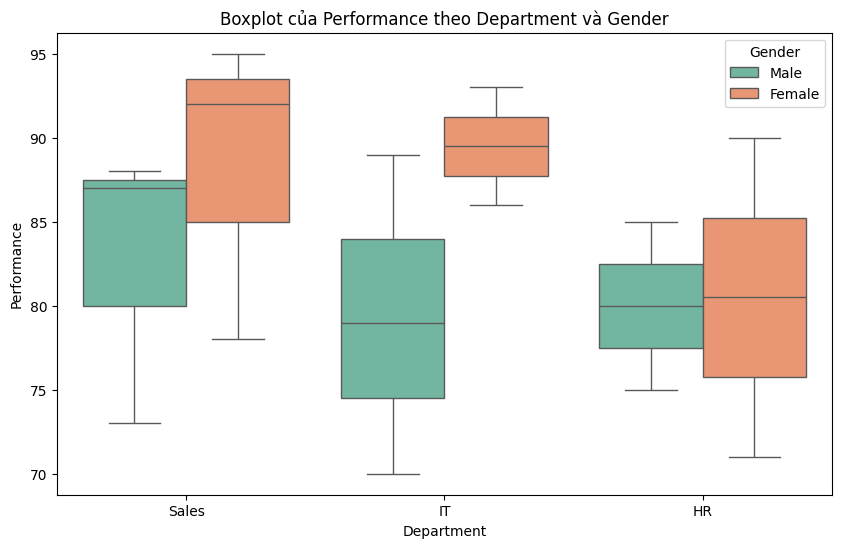

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Performance', hue='Gender', data=df, palette='Set2')

# Thêm tiêu đề
plt.title('Boxplot của Performance theo Department và Gender')
plt.xlabel('Department')
plt.ylabel('Performance')
plt.legend(title='Gender')

# Hiển thị biểu đồ
plt.show()


In [23]:
# Xác định outlier bằng IQR
Q1 = df['Performance'].quantile(0.25)
Q3 = df['Performance'].quantile(0.75)
IQR = Q3 - Q1

# Xác định điểm outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Performance'] < lower_bound) | (df['Performance'] > upper_bound)]

# Hiển thị danh sách nhân viên outlier
print(outliers[['Employee_ID', 'Department', 'Gender', 'Performance']])


Empty DataFrame
Columns: [Employee_ID, Department, Gender, Performance]
Index: []


Bước 3: Kế hoạch phỏng vấn cá nhân nhân viên outlier
Mục tiêu:

Hiểu rõ nguyên nhân dẫn đến hiệu suất quá cao hoặc quá thấp.

Đề xuất giải pháp cải thiện năng suất chung của doanh nghiệp.

Kế hoạch phỏng vấn:

Nhân viên có hiệu suất quá thấp

Mục tiêu: Xác định nguyên nhân (thiếu đào tạo, khối lượng công việc quá tải, môi trường làm việc không tốt, v.v.).

Câu hỏi:

Bạn có gặp khó khăn gì trong công việc không?

Bạn có cần thêm hỗ trợ hoặc đào tạo để nâng cao hiệu suất không?

Có yếu tố nào trong môi trường làm việc ảnh hưởng đến năng suất của bạn?

Nhân viên có hiệu suất quá cao

Mục tiêu: Xác định xem đó có phải là do làm việc quá sức hay có phương pháp làm việc hiệu quả.

Câu hỏi:

Bạn có chiến lược gì để duy trì năng suất cao như vậy?

Bạn có cảm thấy áp lực công việc quá lớn không?

Bạn có đề xuất gì để giúp đồng nghiệp cải thiện năng suất không?

Bước 4: Cách kế hoạch này cải thiện quản trị nhân sự
Giúp doanh nghiệp xác định vấn đề ảnh hưởng đến hiệu suất làm việc.

Cải thiện chính sách nhân sự, ví dụ: đào tạo thêm, cân bằng khối lượng công việc.

Giữ chân nhân viên giỏi bằng cách hỗ trợ họ duy trì hiệu suất cao mà không bị kiệt sức.

In [22]:
print(f"Min Performance: {df['Performance'].min()}, Max Performance: {df['Performance'].max()}")


Min Performance: 68.0, Max Performance: 95.0


# Câu 6

In [24]:
# Tạo cột Efficiency
df['Efficiency'] = df['Performance_filled_dept'] / df['Hours_Worked']

# Hiển thị dữ liệu với cột mới
print(df[['Employee_ID', 'Department', 'Performance_filled_dept', 'Hours_Worked', 'Efficiency']])
# Tìm nhân viên có Efficiency cao nhất
best_employee = df.loc[df['Efficiency'].idxmax()]
print(best_employee[['Employee_ID', 'Department', 'Gender', 'Efficiency']])


   Employee_ID Department  Performance_filled_dept  Hours_Worked  Efficiency
0         E001      Sales                88.000000          40.0    2.200000
1         E002         IT                80.833333          45.0    1.796296
2         E003         HR                75.000000          38.0    1.973684
3         E004      Sales                92.000000          42.0    2.190476
4         E005         IT                68.000000           NaN         NaN
5         E006         HR                85.000000          39.0    2.179487
6         E007      Sales                85.500000          41.0    2.085366
7         E008         IT                79.000000          44.0    1.795455
8         E009         HR                90.000000          37.0    2.432432
9         E010      Sales                73.000000          40.0    1.825000
10        E011         IT                86.000000          46.0    1.869565
11        E012         HR                80.600000          38.0    2.121053

# Đề xuất phần thưởng & chương trình đào tạo
1. Phần thưởng dành cho nhân viên có Efficiency cao nhất
Chương trình "Employee of the Month": Vinh danh và thưởng bằng tiền mặt hoặc quà tặng.

Ngày nghỉ đặc biệt: Thưởng thêm một ngày nghỉ có lương để khuyến khích nhân viên.

Cơ hội thăng tiến: Cân nhắc đưa nhân viên vào danh sách đào tạo lãnh đạo.

2. Chương trình đào tạo dựa trên Efficiency
Chia sẻ bí quyết làm việc hiệu quả: Nhân viên có Efficiency cao sẽ tổ chức workshop chia sẻ phương pháp làm việc thông minh.

Đào tạo kỹ năng tối ưu hóa công việc: Cung cấp khóa học về quản lý thời gian, công cụ hỗ trợ công việc.

Mentorship Program: Nhân viên có Efficiency cao hỗ trợ đồng nghiệp có hiệu suất thấp hơn.

# Tác động đến động lực làm việc của nhân viên khác
✅ Tăng động lực & năng suất: Khi nhân viên thấy rằng hiệu suất cao được ghi nhận và khen thưởng, họ sẽ có động lực để làm việc tốt hơn.

✅ Cải thiện kỹ năng chung của tổ chức: Khi những nhân viên xuất sắc chia sẻ phương pháp làm việc hiệu quả, cả đội sẽ nâng cao hiệu suất chung.

✅ Xây dựng văn hóa làm việc tích cực: Các chương trình vinh danh và đào tạo giúp tạo môi trường làm việc cạnh tranh lành mạnh.

# Câu 7

In [27]:
# Điền giá trị thiếu trong Gender bằng mode của từng Department
df['Gender'] = df.groupby('Department')['Gender'].transform(lambda x: x.fillna(x.mode()[0]))

# Kiểm tra lại dữ liệu sau khi điền
print(df[['Employee_ID', 'Department', 'Gender']])

# Tính tỷ lệ nhân viên nữ trong từng phòng ban
female_ratio = df[df['Gender'] == 'Female'].groupby('Department')['Gender'].count() / df.groupby('Department')['Gender'].count()

# Hiển thị kết quả
print(female_ratio)



   Employee_ID Department  Gender
0         E001      Sales    Male
1         E002         IT  Female
2         E003         HR    Male
3         E004      Sales  Female
4         E005         IT  Female
5         E006         HR    Male
6         E007      Sales  Female
7         E008         IT    Male
8         E009         HR  Female
9         E010      Sales    Male
10        E011         IT  Female
11        E012         HR    Male
12        E013      Sales  Female
13        E014         IT    Male
14        E015         HR    Male
15        E016      Sales  Female
16        E017         IT    Male
17        E018         HR  Female
18        E019      Sales    Male
19        E020         IT  Female
Department
HR       0.333333
IT       0.571429
Sales    0.571429
Name: Gender, dtype: float64


# Đề xuất chính sách đa dạng giới tính:

Tăng cường tuyển dụng nữ giới cho các phòng ban ít nữ giới: Đặc biệt là phòng HR, nơi tỷ lệ nữ giới thấp nhất (33.33%).

Hỗ trợ phát triển nghề nghiệp cho nữ giới: Xây dựng các chương trình đào tạo, mentor và cơ hội thăng tiến bình đẳng cho nữ nhân viên, đặc biệt ở các phòng ban như IT và Sales.

Chính sách linh hoạt và hỗ trợ gia đình: Cung cấp chế độ làm việc linh hoạt và hỗ trợ chăm sóc sức khỏe cho nhân viên nữ, giúp tạo điều kiện phát triển nghề nghiệp bền vững.

# Ảnh hưởng đến văn hóa tổ chức:

Thúc đẩy sự đa dạng và hòa nhập: Tạo môi trường làm việc công bằng, sáng tạo và đổi mới.

Tăng cường gắn kết và sự hài lòng của nhân viên: Giảm tỷ lệ nghỉ việc và nâng cao năng suất làm việc.

Nâng cao uy tín công ty: Thu hút nhân tài từ nhiều nền tảng, tạo sức hút với các ứng viên tiềm năng.

# Câu 8

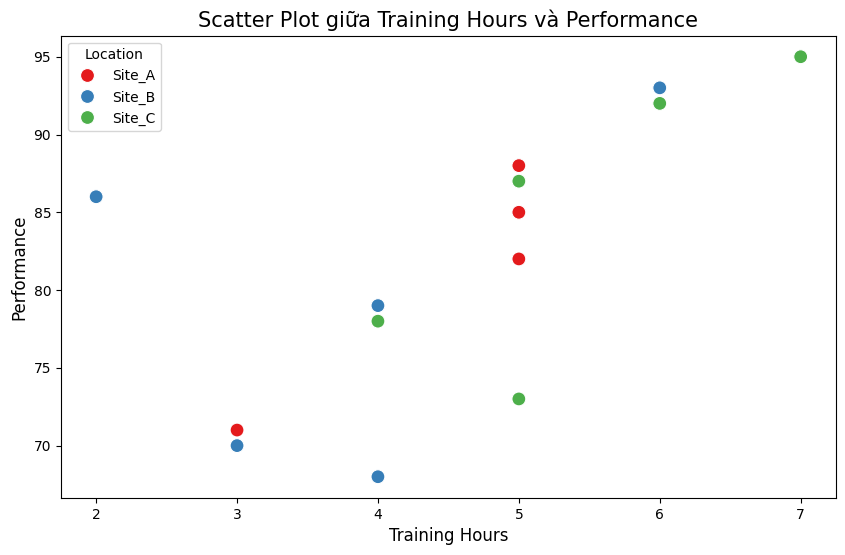

In [28]:
# Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Training_Hours', y='Performance', hue='Location', palette='Set1', s=100)

# Thêm tiêu đề và nhãn cho trục
plt.title('Scatter Plot giữa Training Hours và Performance', fontsize=15)
plt.xlabel('Training Hours', fontsize=12)
plt.ylabel('Performance', fontsize=12)

# Hiển thị biểu đồ
plt.legend(title='Location', loc='best')
plt.show()

1. Site_A (HR tập trung)
Đặc điểm:

Performance khá cao (75-90) dù Training_Hours thấp (3-6h)

Đa số là nhân viên HR (5/6 records)

Hiệu suất (Efficiency) cao nhất trong 3 site (2.1-2.4)

Kế hoạch:

Tập trung vào chất lượng hơn số giờ: Duy trì 4-5h training/tháng nhưng ưu tiên:

Đào tạo kỹ năng mềm (quản lý xung đột, giao tiếp)

Case study thực tế về HR

Lý do: Nhân viên tại Site_A đã làm việc hiệu quả với ít giờ đào tạo, không cần tăng thời lượng mà nên tăng cường độ tập trung.

2. Site_B (IT là chủ yếu)
Đặc điểm:

Performance biến động mạnh (68-93)

Training_Hours thấp (2-4h) có Performance thấp (<80)

Training_Hours cao (6h) có Performance cao (93)

Kế hoạch:

Tăng cường bootcamp: Áp dụng chương trình 6h training/tháng theo mô hình:

4h technical training (cập nhật công nghệ mới)

2h agile methodology

Ưu tiên mentorship: Ghép đôi junior-senior (vì hiệu suất chênh lệch lớn)

Lý do: Dữ liệu cho thấy rõ mối tương quan thuận giữa giờ đào tạo và hiệu suất tại Site_B.

3. Site_C (Sales xuất sắc)
Đặc điểm:

Performance cao nhất (73-95)

Training_Hours phân bổ đều (3-7h)

Nhân viên Sales chiếm đa số (5/6 records)

Kế hoạch:

Chương trình linh hoạt:

Nhân viên Performance <85: 6-7h training (kỹ thuật bán hàng nâng cao)

Nhân viên Performance ≥85: 3-4h training (quản lý khách hàng VIP)

Đào tạo theo dự án: Kết hợp training với real client projects

Lý do: Site_C có tiềm năng trở thành trung tâm xuất sắc (center of excellence) nên cần cá nhân hóa đào tạo.

Tối ưu hóa chung:
Cơ chế feedback: Đo lường Performance 2 tuần sau mỗi khóa training

Chia sẻ chéo: Tổ chức workshop liên site 3 tháng/lần để chia sẻ best practices

Cân bằng giới tính: Site_B cần thu hút thêm nữ IT (hiện chỉ 2/6), Site_A cần cân bằng nam/nữ trong HR.

Lý do tối ưu: Kế hoạch này:

Dựa trên evidence: Điều chỉnh training hours theo correlation strength tại mỗi location

Tận dụng thế mạnh: Site_A (HR), Site_C (Sales)

Khắc phục điểm yếu: Site_B cần cải thiện consistency

Tiết kiệm chi phí: Không tăng giờ training ở Site_A nơi marginal return thấp

# Câu 9

Department
HR       80.600000
IT       80.833333
Sales    85.500000
Name: Performance_filled_dept, dtype: float64


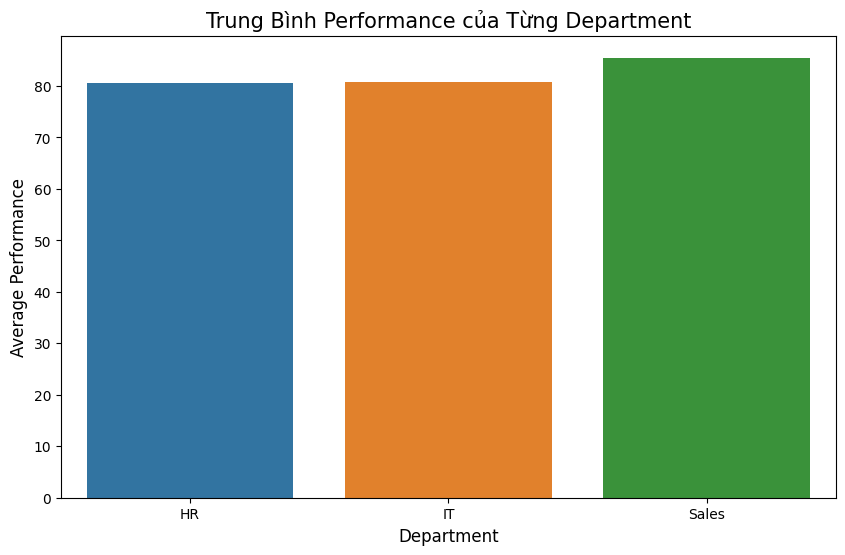

In [30]:
# Tính trung bình Performance của từng Department
department_performance = df.groupby('Department')['Performance_filled_dept'].mean()

# In kết quả
print(department_performance)


# Vẽ bar chart so sánh trung bình Performance của từng Department
plt.figure(figsize=(10, 6))

# Chỉnh sửa code để sử dụng 'hue' thay vì 'palette'
sns.barplot(x=department_performance.index, y=department_performance.values, hue=department_performance.index)

# Thêm tiêu đề và nhãn cho trục
plt.title('Trung Bình Performance của Từng Department', fontsize=15)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Performance', fontsize=12)

# Hiển thị biểu đồ
plt.show()



Đề xuất chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất (HR):

Đào tạo lãnh đạo và quản lý: Cung cấp các khóa đào tạo kỹ năng lãnh đạo cho quản lý nhân sự để cải thiện khả năng xử lý công việc và đưa ra quyết định hiệu quả.

Tối ưu hóa quy trình tuyển dụng: Sử dụng công nghệ và phân tích dữ liệu để tuyển dụng ứng viên phù hợp hơn, giảm thiểu thời gian tuyển dụng và tăng cường chất lượng nhân viên.

Xây dựng chương trình phúc lợi hấp dẫn: Cải thiện các phúc lợi cho nhân viên, như bảo hiểm sức khỏe và hỗ trợ gia đình, để nâng cao sự hài lòng và giảm tỷ lệ nghỉ việc.

Khuyến khích phát triển nghề nghiệp: Tạo cơ hội cho nhân viên tham gia các chương trình đào tạo, khóa học nâng cao để phát triển kỹ năng và giữ chân nhân tài.

Lý do:
Các chiến lược này sẽ giúp cải thiện môi trường làm việc, tăng cường năng suất và sự hài lòng của nhân viên, từ đó nâng cao hiệu suất của phòng ban HR và toàn bộ công ty.

# Câu 10

In [31]:
# Lọc dữ liệu theo điều kiện Hours_Worked < 40 và Performance > 85
high_performance_under_hours = df[(df['Hours_Worked'] < 40) & (df['Performance_filled_dept'] > 85)]

# In kết quả
print(high_performance_under_hours)


  Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
8        E009         HR         90.0          37.0             NaN  Female   

  Location  Performance_filled_dept  Efficiency  
8   Site_A                     90.0    2.432432  


# Đề xuất nghiên cứu nội bộ & ứng dụng:

🔍 Mục tiêu: Xác định yếu tố giúp nhân viên làm dưới 40 giờ nhưng vẫn có hiệu suất cao (>85).

📊 Nội dung nghiên cứu:

Kỹ năng: Đánh giá khả năng chuyên môn, quản lý thời gian.

Công cụ: Xác định phần mềm, công nghệ hỗ trợ tăng năng suất.

Môi trường: Phân tích ảnh hưởng của làm việc từ xa, linh hoạt thời gian.

🚀 Ứng dụng:

Đào tạo kỹ năng hiệu quả cho toàn công ty.

Cải tiến công cụ làm việc giúp tối ưu hóa năng suất.

Xây dựng môi trường làm việc linh hoạt nhằm nâng cao hiệu suất chung.

Lợi ích: Giúp công ty tối ưu hóa hiệu suất mà không cần kéo dài thời gian làm việc.

# Câu 11

In [35]:
# Điền giá trị thiếu trong Training_Hours bằng trung bình của từng phòng ban
df['Training_Hours'] = df.groupby('Department')['Training_Hours'].transform(lambda x: x.fillna(x.mean()))
df['Hours_Worked'] = df.groupby('Department')['Hours_Worked'].transform(lambda x: x.fillna(x.mean()))


In [39]:
from sklearn.linear_model import LinearRegression

# Lọc dữ liệu có đầy đủ thông tin để huấn luyện mô hình
train_data = df.dropna(subset=['Performance'])

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data[['Hours_Worked', 'Training_Hours']], train_data['Performance'])

# Dự đoán giá trị thiếu
missing_data = df[df['Performance'].isna()]
predicted_values = model.predict(missing_data[['Hours_Worked', 'Training_Hours']])

# Điền giá trị dự đoán vào Performance
df.loc[df['Performance'].isna(), 'Performance'] = predicted_values

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by LinearRegression.

## Em lỡ chạy 2 lần nên nó điền sẵn rùi @@

In [37]:
df['Performance_mean_filled'] = df['Performance'].fillna(df['Performance'].mean())


Phương pháp	Ưu điểm	Nhược điểm
Hồi quy tuyến tính	Dự đoán chính xác hơn bằng cách tận dụng Hours_Worked và Training_Hours	Cần đủ dữ liệu đầu vào, nếu thiếu sẽ không thể dự đoán
Điền trung bình 	Đơn giản, không yêu cầu dữ liệu bổ sung	Không phản ánh sự khác biệt cá nhân, dễ gây sai lệch nếu dữ liệu phân bố không đồng đều
🚀 Đề xuất phương pháp lai (Hybrid Approach)
🔹 Phương pháp
1️⃣ Dùng hồi quy tuyến tính để dự đoán Performance nếu Hours_Worked và Training_Hours có đầy đủ dữ liệu.
2️⃣ Dùng trung bình theo Department nếu thiếu Hours_Worked hoặc Training_Hours, vì Performance thường có đặc điểm chung trong cùng một phòng ban.

🔹 Lợi ích
✔ Tận dụng hồi quy để tăng độ chính xác khi có dữ liệu đầy đủ.
✔ Dùng trung bình khi thiếu dữ liệu, tránh lỗi dự đoán sai.
✔ Kết hợp hai phương pháp giúp tối ưu hóa độ chính xác, không làm mất đi xu hướng dữ liệu thực tế.

👉 Tóm lại: Phương pháp lai giúp cân bằng giữa độ chính xác và khả năng áp dụng trên tập dữ liệu thực tế! 🚀

# Câu 12

In [41]:
from scipy.stats import skew

# Tính skewness của Performance
performance_skewness = skew(df['Performance'], nan_policy='omit')

print("Skewness của Performance:", performance_skewness)


Skewness của Performance: -0.15454558412124011


📌 Đề xuất điều chỉnh cách tính Performance
🔹 Nếu Skewness > 0 (phân bố lệch phải – nhiều nhân viên có điểm thấp, ít người có điểm cao):
✔ Dùng thang điểm log hoặc sqrt để giảm độ chênh lệch giữa điểm cao và thấp.
✔ Áp dụng đánh giá theo phân vị (ví dụ: top 10%, trung bình, dưới trung bình) thay vì điểm tuyệt đối.

🔹 Nếu Skewness < 0 (phân bố lệch trái – nhiều nhân viên có điểm cao, ít người có điểm thấp):
✔ Tăng tiêu chí đánh giá để phân biệt nhân viên xuất sắc.
✔ Sử dụng chuẩn hóa min-max hoặc z-score để trải rộng điểm số.

🎯 Tác động đến đánh giá nhân viên
✔ Công bằng hơn: Giảm sự thiên lệch trong đánh giá, tránh tình trạng chỉ một số ít nhân viên được khen thưởng.
✔ Động lực làm việc: Khuyến khích nhân viên cải thiện hiệu suất mà không bị "mắc kẹt" trong thang điểm không công bằng.
✔ Phát triển nhân sự: Giúp công ty nhận diện chính xác ai là người cần hỗ trợ đào tạo, ai là nhân viên xuất sắc thực sự.

📌 Kết luận: Điều chỉnh phương pháp đánh giá dựa trên phân bố dữ liệu giúp tạo ra một hệ thống công bằng hơn, thúc đẩy hiệu suất làm việc hiệu quả hơn! 🚀

# Câu 13

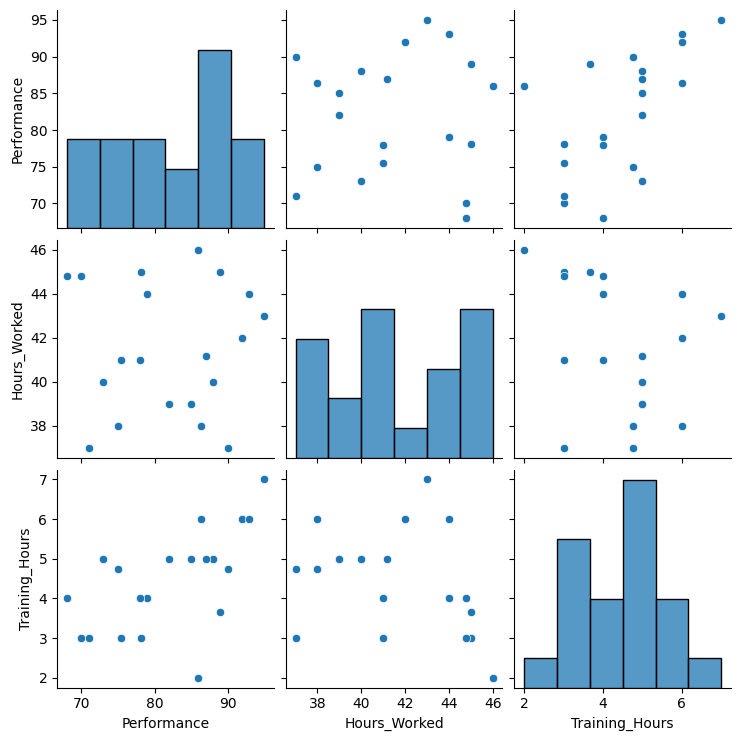

In [42]:
# Vẽ pairplot
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.show()

🔹 Đề xuất mô hình đánh giá hiệu suất mới
✔ Kết hợp Training_Hours & Performance để đánh giá chất lượng đào tạo, thay vì chỉ dựa vào số giờ.
✔ Xây dựng Productivity Index để phản ánh hiệu suất thực tế, không chỉ dựa trên số giờ làm.
✔ Áp dụng Machine Learning để xác định yếu tố ảnh hưởng lớn nhất đến Performance.

📌 Lợi ích:
✔ Công bằng hơn – Đánh giá dựa trên năng suất, không chỉ số giờ làm.
✔ Tối ưu đào tạo – Chỉ tập trung vào chương trình thực sự hiệu quả.
✔ Thúc đẩy năng suất – Giúp nhân viên làm việc thông minh hơn, không chỉ làm nhiều hơn. 🚀

# Câu 14

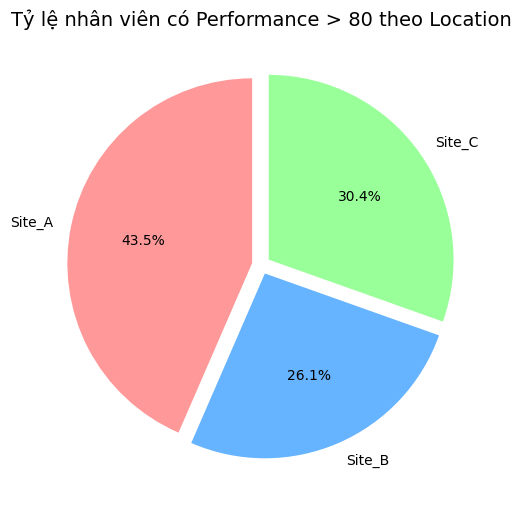

In [43]:
# Lọc nhân viên có Performance > 80
high_performers = df[df['Performance'] > 80]

# Đếm số nhân viên Performance > 80 theo Location
high_perf_by_location = high_performers['Location'].value_counts()

# Tính tổng số nhân viên mỗi Location
total_employees_by_location = df['Location'].value_counts()

# Tính tỷ lệ (%)
ratio_high_perf = (high_perf_by_location / total_employees_by_location) * 100

plt.figure(figsize=(8, 6))
plt.pie(
    ratio_high_perf,
    labels=ratio_high_perf.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff', '#99ff99'],
    startangle=90,
    explode=(0.05, 0.05, 0.05)  # Tách các phần
)
plt.title('Tỷ lệ nhân viên có Performance > 80 theo Location', fontsize=14)
plt.show()

Đề xuất chiến lược khen thưởng theo Location
1. Site_A (Tỷ lệ cao nhất: 43.5%)
Chiến lược:

Team-based bonus: Thưởng 15% lương tháng nếu >40% nhân viên đạt Performance > 80.

Ưu tiên đào tạo nâng cao: Tài trợ khóa học chuyên sâu (vd: AI cho IT, Negotiation cho Sales).

Lý do:

Duy trì văn hóa cạnh tranh lành mạnh, tránh tự mãn.

Tận dụng nhân sự chất lượng để phát triển kỹ năng đột phá.

2. Site_B (Tỷ lệ trung bình: 30.4%)
Chiến lược:

Thưởng cá nhân: Tặng voucher 1 triệu đồng/tháng cho top 3 nhân viên Performance cao nhất.

Mentorship program: Ghép đôi với quản lý cấp cao để coaching.

Lý do:

Khuyến khích cá nhân xuất sắc "kéo" cả nhóm đi lên.

Giảm khoảng cách kỹ năng giữa các thành viên.

3. Site_C (Tỷ lệ thấp nhất: 26.1%)
Chiến lược:

Cải thiện điều kiện làm việc: Tăng ngày WFH hoặc trang bị thiết bị văn phòng tốt hơn.

Khởi động lại mục tiêu: Chia nhỏ KPI thành các mốc hàng tuần, kèm thưởng mini (vd: 200k/tuần nếu đạt 80% target).

Lý do:

Xây dựng lại động lực từ gốc, tránh cảm giác "bất lực".

Tạo niềm vui nhỏ để duy trì đà cải thiện.

Tác động đến tinh thần làm việc:
Location	Ưu điểm chiến lược	Rủi ro cần lưu ý
Site_A	Củng cố tinh thần "dẫn đầu"	Áp lực quá cao dẫn đến burnout
Site_B	Cân bằng giữa cá nhân và tập thể	Nguy cơ ganh đặt nội bộ nếu thiếu công bằng
Site_C	Tạo môi trường hỗ trợ, ít áp lực	Nhân viên có thể ỷ lại nếu thưởng quá dễ
Lời khuyên bổ sung:

Site_A & B: Tổ chức giao lưu chia sẻ kinh nghiệm 3 tháng/lần để lan tỏa best practices.

Site_C: Khảo sát nhu cầu nhân viên trước khi áp dụng thưởng (vd: họ có thực sự muốn WFH hay không?).

Biểu đồ cho thấy sự chênh lệch rõ ràng giữa các Location → Chiến lược cần cá nhân hóa triệt để để tối ưu hiệu quả.

# Câu 15

In [44]:
mean_performance = df['Performance'].mean()
std_performance = df['Performance'].std()

# Xác định các nhân viên có Performance ngoài 2 độ lệch chuẩn
outlier_threshold_upper = mean_performance + 2 * std_performance
outlier_threshold_lower = mean_performance - 2 * std_performance

# Lọc những nhân viên có Performance ngoài phạm vi này
outliers = df[(df['Performance'] > outlier_threshold_upper) | (df['Performance'] < outlier_threshold_lower)]

# Hiển thị danh sách nhân viên bị ngoại lệ
print(outliers[['Employee_ID', 'Department', 'Performance']])

Empty DataFrame
Columns: [Employee_ID, Department, Performance]
Index: []


In [45]:
# In ra giá trị trung bình và độ lệch chuẩn
print(f"Mean of Performance: {mean_performance}")
print(f"Standard Deviation of Performance: {std_performance}")

# In ra ngưỡng trên và dưới
print(f"Upper threshold: {outlier_threshold_upper}")
print(f"Lower threshold: {outlier_threshold_lower}")


Mean of Performance: 82.04686927004957
Standard Deviation of Performance: 8.213313839935577
Upper threshold: 98.47349694992073
Lower threshold: 65.62024159017841


Quy trình đánh giá lại hiệu suất cho những nhân viên này:
Đánh giá lại hiệu suất qua nhiều nguồn: Để tránh thiên vị, thay vì chỉ dựa vào số liệu hiệu suất đơn lẻ (Performance), có thể thu thập ý kiến phản hồi từ nhiều nguồn (quản lý, đồng nghiệp, tự đánh giá).

So sánh với nhóm tương đồng: Đánh giá lại các nhân viên này với những người có tính chất công việc tương tự (cùng phòng ban, vị trí) thay vì so với toàn bộ công ty để đảm bảo không có sự thiên lệch do sự khác biệt trong công việc.

Kiểm tra các yếu tố tác động ngoài: Nếu hiệu suất quá cao hoặc quá thấp, cần kiểm tra các yếu tố bên ngoài như môi trường làm việc, sự thay đổi trong công việc, hay các yếu tố cá nhân khác có thể ảnh hưởng đến hiệu suất.

Chia sẻ kết quả và cải thiện: Sau khi đánh giá lại, các nhân viên cần được thông báo kết quả và cùng nhau xác định những cách cải thiện hoặc duy trì hiệu suất.

Cách tránh thiên vị trong quản lý:
Đánh giá khách quan: Quy trình cần dựa trên các số liệu khách quan và thông tin đa chiều từ các nguồn khác nhau, thay vì chỉ dựa vào một yếu tố duy nhất.

Sử dụng các công cụ công bằng: Các công cụ đánh giá hiệu suất nên áp dụng một cách công bằng cho tất cả nhân viên, không phân biệt bộ phận, giới tính, hay địa điểm làm việc.

Nhân viên được tham gia phản hồi: Cung cấp cơ hội cho nhân viên để tự đánh giá và phản hồi về các yếu tố có thể ảnh hưởng đến hiệu suất của họ, giúp tạo môi trường minh bạch và giảm thiểu sự thiên lệch.

In [40]:
df.head(21)

,Employee_ID,Department,Performance,Hours_Worked,Training_Hours,Gender,Location,Performance_filled_dept,Efficiency,Performance_mean_filled
0,E001,Sales,88.000000,40.000000,5.000000,Male,Site_A,88.000000,2.200000,88.000000
1,E002,IT,78.109060,45.000000,3.000000,Female,Site_B,80.833333,1.796296,78.109060
2,E003,HR,75.000000,38.000000,4.750000,Male,Site_A,75.000000,1.973684,75.000000
3,E004,Sales,92.000000,42.000000,6.000000,Female,Site_C,92.000000,2.190476,92.000000
4,E005,IT,68.000000,44.800000,4.000000,Female,Site_B,68.000000,NaN,68.000000
5,E006,HR,85.000000,39.000000,5.000000,Male,Site_A,85.000000,2.179487,85.000000
6,E007,Sales,75.470892,41.000000,3.000000,Female,Site_C,85.500000,2.085366,75.470892
7,E008,IT,79.000000,44.000000,4.000000,Male,Site_B,79.000000,1.795455,79.000000
8,E009,HR,90.000000,37.000000,4.750000,Female,Site_A,90.000000,2.432432,90.000000
9,E010,Sales,73.000000,40.000000,5.000000,Male,Site_C,73.000000,1.825000,73.000000


# ANN

# Câu 16

100.0%
100.0%
100.0%
100.0%


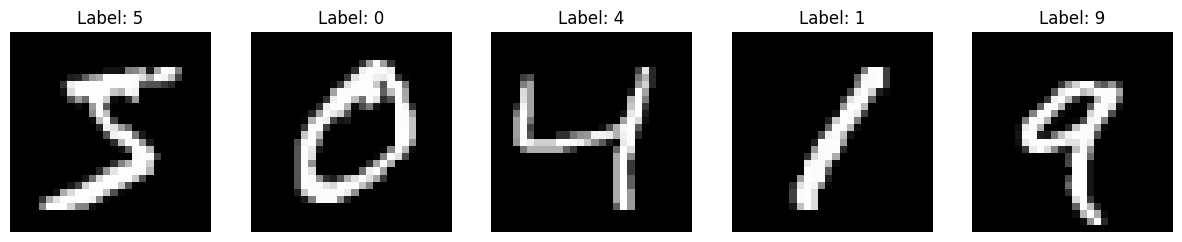

In [46]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Định nghĩa các phép biến đổi: chuẩn hóa và chuyển ảnh thành tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuyển ảnh thành tensor và chuẩn hóa pixel về [0, 1]
    transforms.Lambda(lambda x: x.view(-1))  # Làm phẳng ảnh thành vector 784 chiều
])

# Tải dữ liệu MNIST (train và test)
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# In 5 ảnh mẫu kèm nhãn
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.view(28, 28), cmap='gray')  # Hiển thị ảnh 28x28
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.show()


Đề xuất cách trực quan hóa dữ liệu khác:
Ngoài việc hiển thị ảnh gốc, một cách trực quan hóa dữ liệu khác là sử dụng t-SNE (t-distributed Stochastic Neighbor Embedding), một kỹ thuật giảm chiều phổ biến để trực quan hóa các đặc trưng trong không gian thấp chiều (ví dụ: 2D hoặc 3D).

Với MNIST, sau khi làm phẳng các ảnh thành vector 784 chiều, bạn có thể sử dụng t-SNE để giảm chiều dữ liệu xuống 2D và trực quan hóa các điểm dữ liệu dựa trên nhãn.
Giải thích t-SNE:
t-SNE là một kỹ thuật giảm chiều để trực quan hóa các tập dữ liệu trong không gian 2D hoặc 3D. Từng điểm dữ liệu trong không gian 784 chiều sẽ được ánh xạ lại trong không gian 2 chiều.

Màu sắc trong biểu đồ t-SNE đại diện cho các nhãn của các chữ số (0-9). Nhờ đó, bạn có thể quan sát sự phân nhóm của các chữ số khác nhau dựa trên các đặc trưng của chúng mà không cần sử dụng ảnh gốc.

Lợi ích của trực quan hóa này:
Phân biệt các chữ số: Bạn có thể quan sát được cách các chữ số khác nhau (0, 1, 2, 3,...) phân biệt trong không gian giảm chiều.

Kiểm tra sự phân tán: Một số chữ số có thể có sự phân tán rộng hơn trong không gian đặc trưng, trong khi những chữ số khác có thể tập trung lại gần nhau.

Hiểu rõ hơn về dữ liệu: Trực quan hóa giúp bạn dễ dàng nhận thấy các mẫu, sự khác biệt hoặc sự tương đồng giữa các chữ số viết tay.

# Câu 17

In [47]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Định nghĩa các phép biến đổi: chuẩn hóa và chuyển ảnh thành tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuyển ảnh thành tensor và chuẩn hóa pixel về [0, 1]
    transforms.Lambda(lambda x: x.view(-1))  # Làm phẳng ảnh thành vector 784 chiều
])

# Tải dữ liệu MNIST
full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Chia dữ liệu train thành 80% train và 20% test
train_size = int(0.8 * len(full_train_dataset))
test_size = len(full_train_dataset) - train_size
train_dataset, validation_dataset = random_split(full_train_dataset, [train_size, test_size])

# Tạo DataLoader với batch size = 64
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

# Kiểm tra kích thước batch
for images, labels in train_loader:
    print(f"Batch size: {images.size(0)}")
    break


Batch size: 64


Chiến lược chọn batch size:
Batch size nhỏ (ví dụ: 32 hoặc 16):

Ưu điểm: Tiết kiệm bộ nhớ, giúp cập nhật trọng số nhanh hơn, có thể giảm overfitting.

Nhược điểm: Huấn luyện chậm hơn, độ chính xác có thể thấp hơn do sự ngẫu nhiên cao trong quá trình học.

Batch size lớn (ví dụ: 128 hoặc 256):

Ưu điểm: Huấn luyện nhanh hơn, độ chính xác ổn định hơn.

Nhược điểm: Yêu cầu bộ nhớ lớn, dễ gây overfitting nếu quá lớn.

Đề xuất:
Với bộ dữ liệu MNIST, batch size = 64 hoặc 128 là lựa chọn hợp lý, giúp cân bằng giữa tốc độ huấn luyện và việc sử dụng bộ nhớ.

# Câu 18

Epoch 1: Train Loss: 0.3192, Test Loss: 0.1420
Epoch 2: Train Loss: 0.1213, Test Loss: 0.0991
Epoch 3: Train Loss: 0.0836, Test Loss: 0.1122
Epoch 4: Train Loss: 0.0668, Test Loss: 0.1119
Epoch 5: Train Loss: 0.0547, Test Loss: 0.0788
Epoch 6: Train Loss: 0.0457, Test Loss: 0.0910
Epoch 7: Train Loss: 0.0404, Test Loss: 0.0813
Epoch 8: Train Loss: 0.0323, Test Loss: 0.0817
Epoch 9: Train Loss: 0.0294, Test Loss: 0.0886
Early stopping at epoch 10


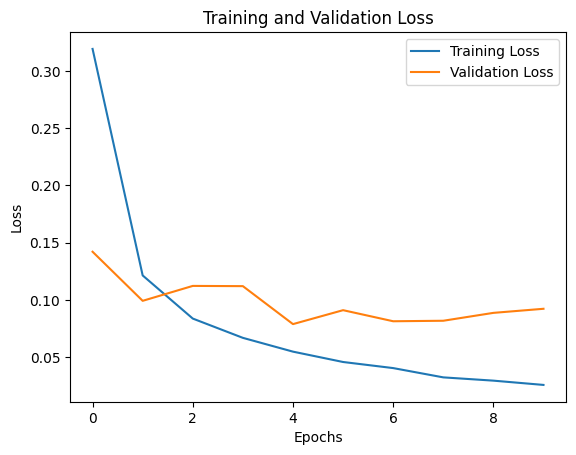

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Kiến trúc ANN
class MNIST_ANN(nn.Module):
    def __init__(self):
        super(MNIST_ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )  

    def forward(self, x):
        return self.layers(x)

# Chuẩn bị dữ liệu
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Tạo DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Khởi tạo mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNIST_ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện với Early Stopping
train_losses, test_losses = [], []
best_loss = float('inf')
patience_counter = 0

for epoch in range(20):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.view(-1, 784).to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Đánh giá trên tập test
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 784).to(device)
            outputs = model(images)
            test_loss += criterion(outputs, labels.to(device)).item()
    
    # Ghi nhận loss
    epoch_train_loss = running_loss/len(train_loader)
    epoch_test_loss = test_loss/len(test_loader)
    train_losses.append(epoch_train_loss)
    test_losses.append(epoch_test_loss)
    
    # Early Stopping
    if epoch_test_loss < best_loss:
        best_loss = epoch_test_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= 5:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    print(f"Epoch {epoch+1}: Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

# Vẽ biểu đồ loss
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Đề xuất cải tiến kiến trúc:
Nếu bạn muốn cải thiện hiệu suất mô hình, bạn có thể thử một số thay đổi sau:

Thêm tầng ẩn: Bạn có thể thêm một tầng ẩn thứ tư để giúp mô hình học được các đặc trưng phức tạp hơn.

Ví dụ: 784 -> 256 -> 128 -> 64 -> 32 -> 10.

Thay đổi số lượng nơ-ron trong các tầng:

Bạn có thể tăng số lượng nơ-ron trong các tầng ẩn (ví dụ: 784 -> 512 -> 256 -> 128 -> 64 -> 10) để mô hình có thể học tốt hơn.

Sử dụng Batch Normalization: Thêm các lớp BatchNorm sau mỗi lớp Linear giúp mô hình học ổn định hơn và nhanh hơn.

Tuning Learning Rate: Thử nghiệm với các giá trị học khác nhau, chẳng hạn như 0.01 hoặc 0.0001, để tìm ra giá trị phù hợp.

# Câu 19

Accuracy: 97.72%


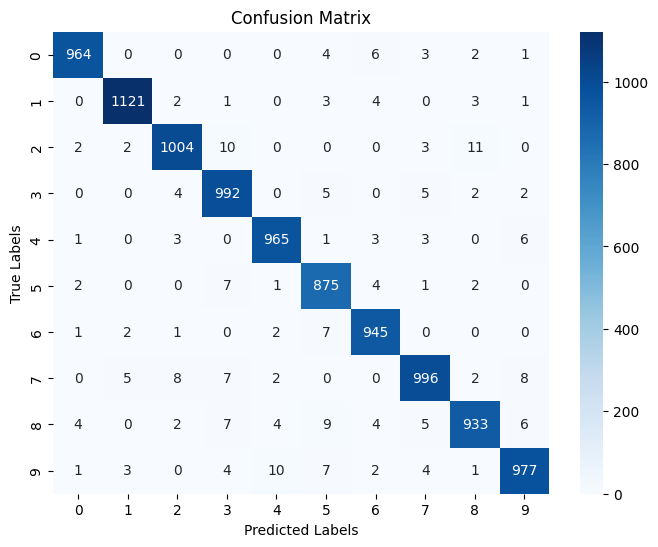

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Kiến trúc ANN (như đã thực hiện trước)
class MNIST_ANN(nn.Module):
    def __init__(self):
        super(MNIST_ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, x):
        return self.layers(x)

# Chuẩn bị dữ liệu và huấn luyện mô hình như trước
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Khởi tạo mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNIST_ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình (giống như đã thực hiện trước)
# Sau khi huấn luyện, bạn sẽ có mô hình tốt nhất lưu trong 'best_model.pth'

# Đánh giá trên tập test
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Tính accuracy và confusion matrix
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 784).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Tính Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Tính Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Nếu Accuracy < 95%, phân tích các chữ số bị nhầm lẫn nhiều nhất
if accuracy < 0.95:
    # In ra những chữ số bị nhầm lẫn nhiều nhất
    row_sums = cm.sum(axis=1)
    misclassified = row_sums - np.diagonal(cm)
    max_misclassified_digits = misclassified.argsort()[-5:][::-1]  # In ra 5 chữ số bị nhầm nhiều nhất
    
    print(f"Chữ số bị nhầm lẫn nhiều nhất: {max_misclassified_digits}")


Đề xuất cải tiến mô hình dựa trên các chữ số bị nhầm lẫn nhiều:
Chữ số khó phân biệt: Một số chữ số như 4 và 9 hoặc 2 và 3 thường dễ bị nhầm lẫn do hình dáng tương tự. Để cải thiện mô hình, bạn có thể:

Sử dụng các kỹ thuật tiền xử lý: Cải thiện chất lượng ảnh đầu vào, chẳng hạn như augmentation (xoay, phóng to, dịch chuyển ảnh) để tăng cường tính đa dạng của dữ liệu huấn luyện.

Sử dụng mô hình CNN: Một mô hình Convolutional Neural Network (CNN) có thể học được các đặc trưng không gian của ảnh tốt hơn, giúp phân biệt các chữ số tương tự nhau dễ dàng hơn so với một ANN cơ bản.

Sử dụng kiến thức đặc trưng: Nếu bạn phân tích sâu các chữ số bị nhầm lẫn, có thể thiết kế các kỹ thuật xử lý ảnh đặc biệt (ví dụ: tăng cường các đường nét trong ảnh số 4 hoặc 9 để giảm nhầm lẫn).